In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [6]:
df = pd.read_csv('./insurance.csv')
df.shape

(1338, 7)

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
ct = ColumnTransformer([
    ('min_max_scaling', MinMaxScaler(),['age','bmi','children']),
    ('one_hot_encoding', OneHotEncoder(drop='if_binary'),['sex','smoker','region'])
])

In [9]:
X = df.drop('charges',axis=1)
y = df['charges']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17)

In [11]:
ct.fit(X_train)

X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

In [12]:
initial_learning_rate = 0.01
epochs = 250
decay = initial_learning_rate / epochs
def lr_time_based_decay(epoch, lr):
    return lr * 1 / (1 + decay * epoch)

In [13]:
tf.random.set_seed(17)

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['mae'])

history = model.fit(X_train, y_train, epochs= epochs,callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_time_based_decay)])

Epoch 1/250
32/32 [==============================] - 1s 3ms/step - loss: 13749.9473 - mae: 13749.9473 - lr: 0.0010
Epoch 2/250
32/32 [==============================] - 0s 4ms/step - loss: 13747.1328 - mae: 13747.1328 - lr: 9.9996e-04
Epoch 3/250
32/32 [==============================] - 0s 3ms/step - loss: 13741.0732 - mae: 13741.0732 - lr: 9.9988e-04
Epoch 4/250
32/32 [==============================] - 0s 3ms/step - loss: 13728.9316 - mae: 13728.9316 - lr: 9.9976e-04
Epoch 5/250
32/32 [==============================] - 0s 3ms/step - loss: 13707.7676 - mae: 13707.7676 - lr: 9.9960e-04
Epoch 6/250
32/32 [==============================] - 0s 4ms/step - loss: 13672.8730 - mae: 13672.8730 - lr: 9.9940e-04
Epoch 7/250
32/32 [==============================] - 0s 3ms/step - loss: 13624.9756 - mae: 13624.9756 - lr: 9.9916e-04
Epoch 8/250
32/32 [==============================] - 0s 5ms/step - loss: 13553.8457 - mae: 13553.8457 - lr: 9.9888e-04
Epoch 9/250
32/32 [==============================] -

32/32 [==============================] - 0s 3ms/step - loss: 6963.7222 - mae: 6963.7222 - lr: 9.0800e-04
Epoch 71/250
32/32 [==============================] - 0s 3ms/step - loss: 6996.2051 - mae: 6996.2051 - lr: 9.0546e-04
Epoch 72/250
32/32 [==============================] - 0s 4ms/step - loss: 6988.3052 - mae: 6988.3052 - lr: 9.0290e-04
Epoch 73/250
32/32 [==============================] - 0s 3ms/step - loss: 6857.1157 - mae: 6857.1157 - lr: 9.0031e-04
Epoch 74/250
32/32 [==============================] - 0s 3ms/step - loss: 6855.1909 - mae: 6855.1909 - lr: 8.9769e-04
Epoch 75/250
32/32 [==============================] - 0s 3ms/step - loss: 6848.3276 - mae: 6848.3276 - lr: 8.9504e-04
Epoch 76/250
32/32 [==============================] - 0s 2ms/step - loss: 6780.4238 - mae: 6780.4238 - lr: 8.9236e-04
Epoch 77/250
32/32 [==============================] - 0s 3ms/step - loss: 6595.0625 - mae: 6595.0625 - lr: 8.8966e-04
Epoch 78/250
32/32 [==============================] - 0s 2ms/step - l

32/32 [==============================] - 0s 5ms/step - loss: 5012.6099 - mae: 5012.6099 - lr: 6.8186e-04
Epoch 140/250
32/32 [==============================] - 0s 3ms/step - loss: 4907.3335 - mae: 4907.3335 - lr: 6.7809e-04
Epoch 141/250
32/32 [==============================] - 0s 4ms/step - loss: 4838.9443 - mae: 4838.9443 - lr: 6.7431e-04
Epoch 142/250
32/32 [==============================] - 0s 3ms/step - loss: 4910.0830 - mae: 4910.0830 - lr: 6.7053e-04
Epoch 143/250
32/32 [==============================] - 0s 3ms/step - loss: 4863.0903 - mae: 4863.0903 - lr: 6.6674e-04
Epoch 144/250
32/32 [==============================] - 0s 3ms/step - loss: 4863.8760 - mae: 4863.8760 - lr: 6.6295e-04
Epoch 145/250
32/32 [==============================] - 0s 3ms/step - loss: 4783.9238 - mae: 4783.9238 - lr: 6.5915e-04
Epoch 146/250
32/32 [==============================] - 0s 4ms/step - loss: 4754.5098 - mae: 4754.5098 - lr: 6.5535e-04
Epoch 147/250
32/32 [==============================] - 0s 3ms/

Epoch 208/250
32/32 [==============================] - 0s 3ms/step - loss: 4295.4634 - mae: 4295.4634 - lr: 4.2369e-04
Epoch 209/250
32/32 [==============================] - 0s 2ms/step - loss: 4414.1338 - mae: 4414.1338 - lr: 4.2020e-04
Epoch 210/250
32/32 [==============================] - 0s 2ms/step - loss: 4561.9614 - mae: 4561.9614 - lr: 4.1671e-04
Epoch 211/250
32/32 [==============================] - 0s 3ms/step - loss: 4237.8442 - mae: 4237.8442 - lr: 4.1324e-04
Epoch 212/250
32/32 [==============================] - 0s 4ms/step - loss: 4277.2710 - mae: 4277.2710 - lr: 4.0978e-04
Epoch 213/250
32/32 [==============================] - 0s 3ms/step - loss: 4368.9150 - mae: 4368.9150 - lr: 4.0634e-04
Epoch 214/250
32/32 [==============================] - 0s 3ms/step - loss: 4326.0781 - mae: 4326.0781 - lr: 4.0290e-04
Epoch 215/250
32/32 [==============================] - 0s 3ms/step - loss: 4252.0767 - mae: 4252.0767 - lr: 3.9948e-04
Epoch 216/250
32/32 [===========================

In [15]:
model.evaluate(X_test,y_test)

11/11 [==============================] - 0s 2ms/step - loss: 2961.8684 - mae: 2961.8684


[2961.868408203125, 2961.868408203125]

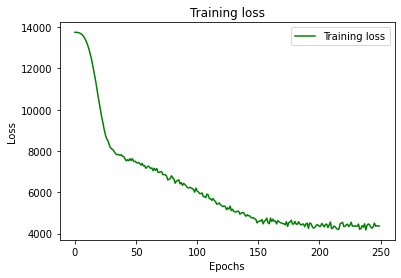

In [16]:
loss_train = history.history['loss']
epoch = range(0,epochs)
plt.plot(epoch, loss_train, 'g', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()